# Ramen Dataset Rapid EDA
#### Data Science Live's first rapid EDA

This Jupyter Notebook is the first in a series of rapid exploratory data analyses, where my cohort and I were given an hour to explore and make observations about a dataset. This notebook has been cleaned and touched up to show as a portfolio piece.

In [140]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14

# Import dataset
ramen = pd.read_csv('data/ramen-ratings.csv')

In [141]:
# Look at the data and summary statistics
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [142]:
# Look at null value and data type information
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [143]:
# Look at summary statistics for numerical and categorical columns
print(ramen.describe())
print(ramen.describe(include='O'))

          Review #
count  2580.000000
mean   1290.500000
std     744.926171
min       1.000000
25%     645.750000
50%    1290.500000
75%    1935.250000
max    2580.000000
         Brand  Variety Style Country Stars Top Ten
count     2580     2580  2578    2580  2580      41
unique     355     2413     7      38    51      38
top     Nissin  Chicken  Pack   Japan     4      \n
freq       381        7  1531     352   384       4


In [144]:
# Explore style column
ramen['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [145]:
# View the rows that have null values
null_styles = ramen[ramen['Style'].isna()]
print(null_styles)

      Review #   Brand            Variety Style Country Stars Top Ten
2152       428  Kamfen     E Menm Chicken   NaN   China  3.75     NaN
2442       138    Unif  100 Furong Shrimp   NaN  Taiwan     3     NaN


There are two null values in the style column. For the purpose of this rapid EDA and considering it's only two rows, these will be dropped.

In [146]:
ramen_clean = ramen.dropna(subset=['Style'])
print(ramen_clean.shape)

(2578, 7)


In [147]:
# Check to see if nulls have been dropped
ramen_clean.isna().sum()

Review #       0
Brand          0
Variety        0
Style          0
Country        0
Stars          0
Top Ten     2537
dtype: int64

In [148]:
# What is the Top Ten Column?
ramen['Top Ten'].unique()

array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10',
       '2012 #7', '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1',
       '2012 #2', '2013 #6', '2012 #4'], dtype=object)

#### Initial Observations
- There's only one numerical column, and that is the review number
- Other category descriptions:

`Brand`: brand of ramen

`Variety`: More or less the flavor of the ramen

`Style`: How the ramen was packaged/served

`Country`: Country of origin

`Stars`: The actual rating of the review; for some reason it's a string.

`Top Ten` : A string indicating whether the ramen was in a top ten rankings list of a given year, and what rank it was given

In [149]:
print(ramen_clean['Stars'].unique())

['3.75' '1' '2.25' '2.75' '4.75' '4' '0.25' '2.5' '5' '4.25' '4.5' '3.5'
 'Unrated' '1.5' '3.25' '2' '0' '3' '0.5' '4.00' '5.0' '3.50' '3.8' '4.3'
 '2.3' '5.00' '3.3' '4.0' '3.00' '1.75' '3.0' '4.50' '0.75' '1.25' '1.1'
 '2.1' '0.9' '3.1' '4.125' '3.125' '2.125' '2.9' '0.1' '2.8' '3.7' '3.4'
 '3.6' '2.85' '3.2' '3.65' '1.8']


In [150]:
# Some of the ramen are unrated
UNRATED_MASK = (ramen_clean['Stars'] == 'Unrated')
print(len(ramen_clean[UNRATED_MASK]))

3


In [151]:
# Since there are only three, these rows will be dropped as well
ramen_clean = ramen_clean[~UNRATED_MASK]
ramen_clean['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', '1.5', '3.25', '2', '0', '3', '0.5', '4.00',
       '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3', '4.0', '3.00',
       '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1', '0.9', '3.1',
       '4.125', '3.125', '2.125', '2.9', '0.1', '2.8', '3.7', '3.4',
       '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [1]:
# Reassign the data type for Stars column to be float and round off to two decimal places
ramen_clean['Stars'] = ramen_clean['Stars'].astype(float)
ramen_clean['Stars'].round(2)

NameError: name 'ramen_clean' is not defined

#### Question 1: What is the distribution of Ramen Brands? Limit to the top 15

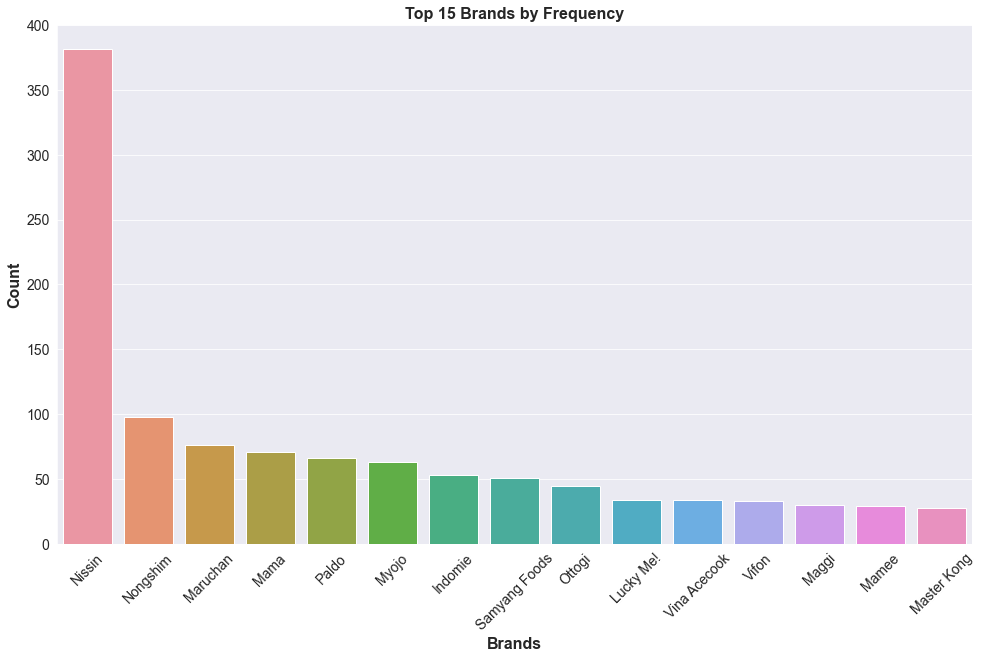

In [153]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=ramen_clean['Brand'].value_counts()[:15].index, y=ramen_clean['Brand'].value_counts()[:15])
plt.tight_layout()
ax.set_title('Top 15 Brands by Frequency', fontdict={'weight':'bold', 'size':16})
ax.set_xlabel('Brands', fontdict={'weight':'bold', 'size':16})
ax.set_ylabel('Count', fontdict={'weight':'bold', 'size':16})
ax.tick_params(axis='x', rotation=45);

#### Question 2: Are there any ramens with a 5 star rating?

In [154]:
FIVE_STARS = (ramen_clean['Stars'] == 5.0)
five_star_ramen = ramen_clean[FIVE_STARS]
print(five_star_ramen.shape)

(386, 7)


#### Question 2.5: What is the distribution of countries that these 5 star ramens come from?

In [155]:
five_star_ramen['Country'].value_counts(normalize=True)

Japan          0.191710
Malaysia       0.139896
Taiwan         0.124352
South Korea    0.113990
Singapore      0.093264
USA            0.080311
Indonesia      0.059585
Hong Kong      0.056995
Thailand       0.049223
China          0.031088
Myanmar        0.010363
UK             0.010363
India          0.005181
Canada         0.005181
Cambodia       0.005181
Philippines    0.005181
Brazil         0.002591
Mexico         0.002591
Vietnam        0.002591
Sarawak        0.002591
Nepal          0.002591
Germany        0.002591
Australia      0.002591
Name: Country, dtype: float64

#### Question 3: What are the average ratings of the different styles of ramen?

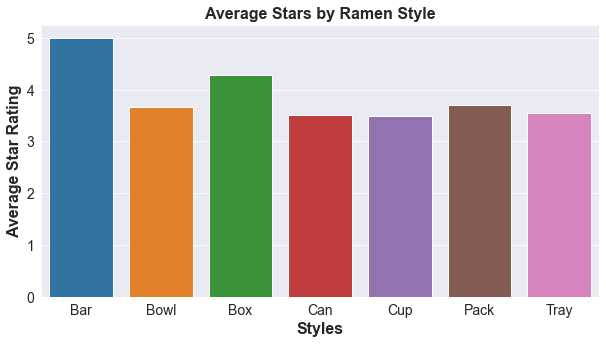

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=ramen_clean.groupby('Style')['Stars'].mean().index, y=ramen_clean.groupby('Style')['Stars'].mean())
ax.set_title('Average Stars by Ramen Style', fontdict={'weight':'bold', 'size':16})
ax.set_xlabel('Styles', fontdict={'weight':'bold', 'size':16})
ax.set_ylabel('Average Star Rating', fontdict={'weight':'bold', 'size':16});

Bar has a perfect 5 star rating, and box is relatively high as well

In [157]:
ramen_clean['Style'].value_counts()

Pack    1528
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

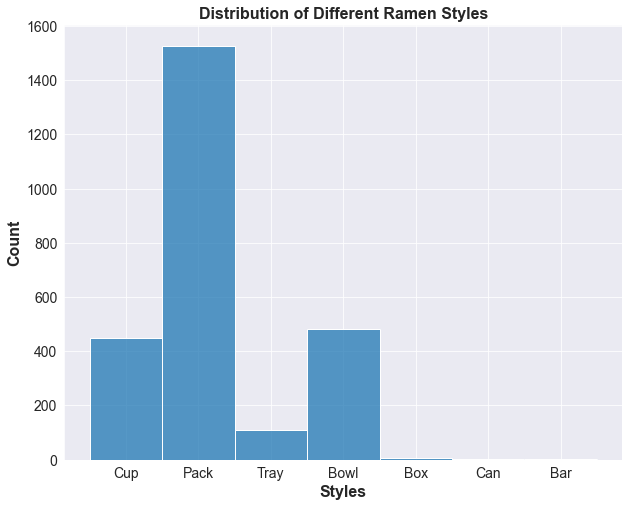

In [158]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=ramen_clean, x='Style')
ax.set_title('Distribution of Different Ramen Styles', fontdict={'weight':'bold', 'size':16})
ax.set_xlabel('Styles', fontdict={'weight':'bold', 'size':16})
ax.set_ylabel('Count', fontdict={'weight':'bold', 'size':16});

The reason why bar style and box style have such high average scores is because they only have a few observations.

Now, we'll take a look at the Top Ten column.

In [159]:
# First fill the missing values with a not-applicable string
ramen_clean['Top Ten'].fillna('N/A', inplace=True)

# There are also some newline characters in there
ramen_clean['Top Ten'] = ramen_clean['Top Ten'].str.replace('\n', 'N/A')

# Time to see if the null values are gone
print(ramen_clean.isna().sum())
print(ramen_clean['Top Ten'].unique())

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Top Ten     0
dtype: int64
['N/A' '2016 #10' '2016 #1' '2016 #8' '2016 #5' '2016 #9' '2016 #7'
 '2015 #10' '2015 #7' '2015 #4' '2015 #9' '2015 #6' '2015 #1' '2013 #10'
 '2015 #8' '2014 #7' '2014 #4' '2014 #9' '2014 #10' '2014 #8' '2014 #5'
 '2014 #6' '2014 #1' '2013 #1' '2013 #2' '2013 #4' '2013 #9' '2013 #3'
 '2012 #10' '2012 #7' '2012 #5' '2012 #3' '2012 #6' '2012 #9' '2012 #1'
 '2012 #2' '2013 #6' '2012 #4']


In [160]:
# Let's look at all the ramen where the Top Ten column is applicable
TOP_TEN = (ramen_clean['Top Ten'] != 'N/A')
top_ten_ramen = ramen_clean[TOP_TEN]
top_ten_ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9


#### Question 4: Which ramen were rated as #1 in the Top Ten category of each year?

In [161]:
NUMBER_ONES = (top_ten_ramen['Top Ten'].str.contains('1$'))
top_ten_ramen[NUMBER_ONES]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,2016 #1
1080,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5.0,2015 #1
1493,1087,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.0,2014 #1
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5.0,2013 #1
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5.0,2012 #1
